In [1]:
import pandas as pd
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
data=pd.read_csv('sms_spam.csv')
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [21]:
# describing the data 
data.describe()

,type,text,processed_text
count,5559,5559,5559
unique,2,5156,5101
top,ham,"Sorry, I'll call later",sorry ill call later
freq,4812,30,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


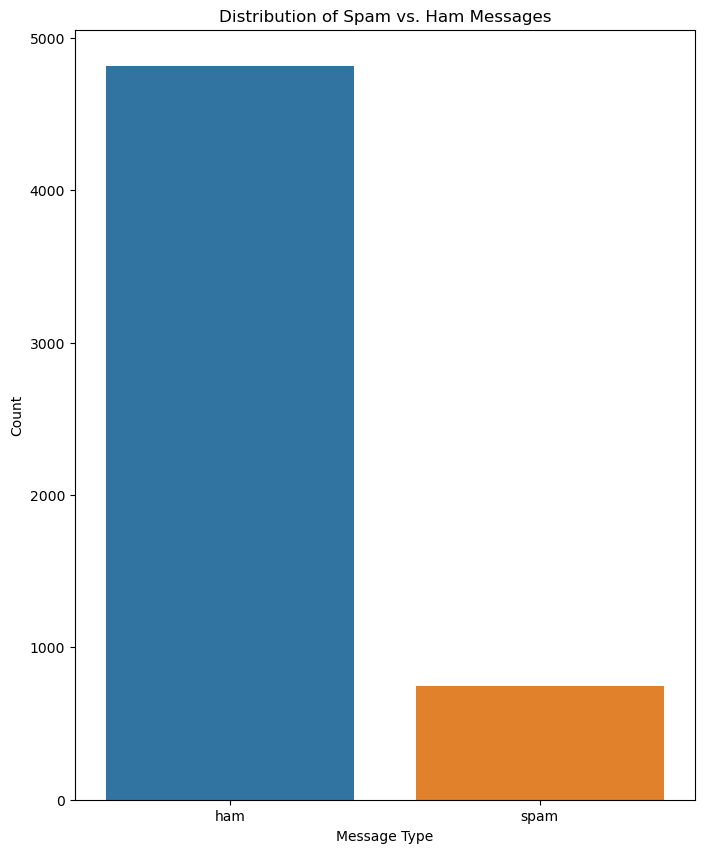

In [22]:
# understanding the Distribution of Spam vs. Ham Messages

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,10))
sns.countplot(x='type',data=data)
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [5]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def preprocess_text(text):
    text=text.lower()
    text=''.join([char for char in text if char not in string.punctuation])
    text=[word for word in text.split() if word not in stopwords.words('english')]
    return ' '.join(text)

In [7]:
data['processed_text']=data['text'].apply(preprocess_text)

In [8]:
data

,type,text,processed_text
0,ham,Hope you are having a good week. Just checking in,hope good week checking
1,ham,K..give back my thanks.,kgive back thanks
2,ham,Am also doing in cbe only. But have to pay.,also cbe pay
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary 4 star ibiza holiday £10000 cash...
4,spam,okmail: Dear Dave this is your final notice to...,okmail dear dave final notice collect 4 teneri...
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,great role model giving much really wish day m...
5555,ham,"Awesome, I remember the last time we got someb...",awesome remember last time got somebody high f...
5556,spam,"If you don't, your prize will go to another cu...",dont prize go another customer tc wwwtcbiz 18 ...
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",sms ac jsco energy high u may know 2channel 2d...


In [9]:
spam_messages=data[data['type']=='spam']['processed_text']


In [10]:
ham_messages = data[data['type'] == 'ham']['processed_text']

In [11]:
def get_most_common_words(messages,n=20):
    all_words = ' '.join(messages).split()
    common_words = Counter(all_words).most_common(n)
    return common_words

In [12]:
spam_common_words = get_most_common_words(spam_messages)
ham_common_words = get_most_common_words(ham_messages)


In [13]:
spam_common_df = pd.DataFrame(spam_common_words, columns=['Word', 'Count'])
ham_common_df = pd.DataFrame(ham_common_words, columns=['Word', 'Count'])

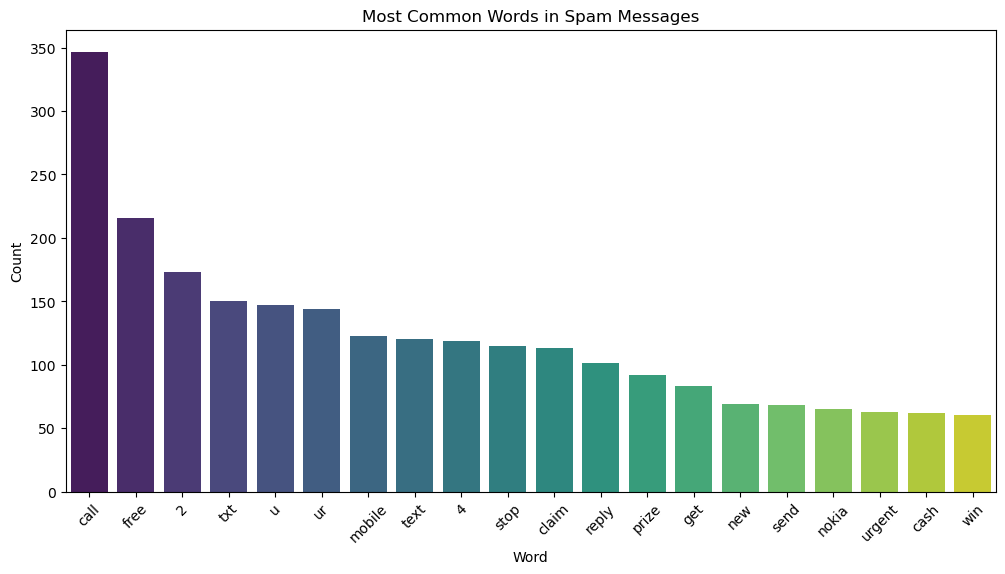

In [14]:
# Plot the most common words in spam messages
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=spam_common_df, palette='viridis')
plt.title('Most Common Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

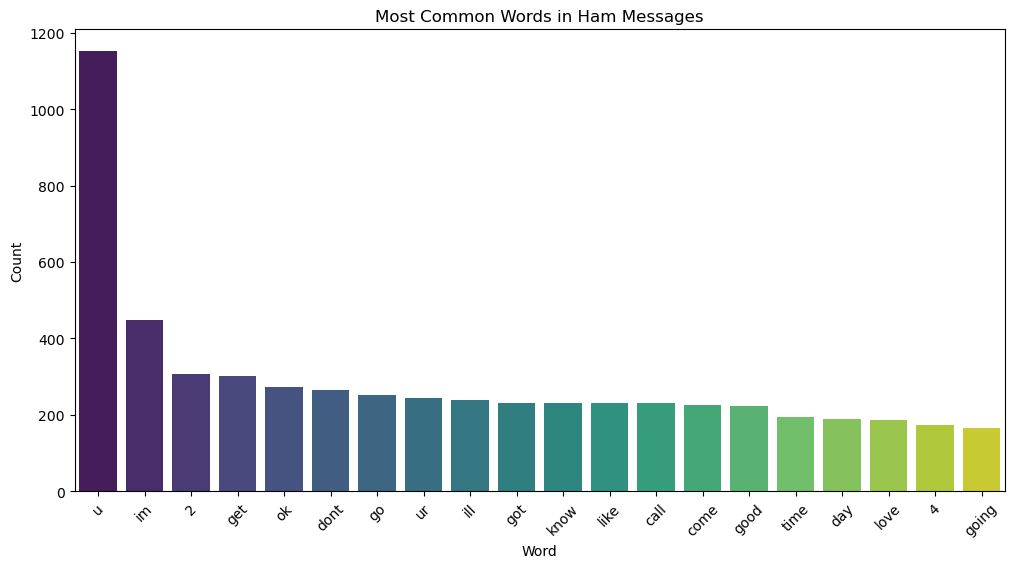

In [15]:
# Plot the most common words in ham messages
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=ham_common_df, palette='viridis')
plt.title('Most Common Words in Ham Messages')
plt.xticks(rotation=45)
plt.show()

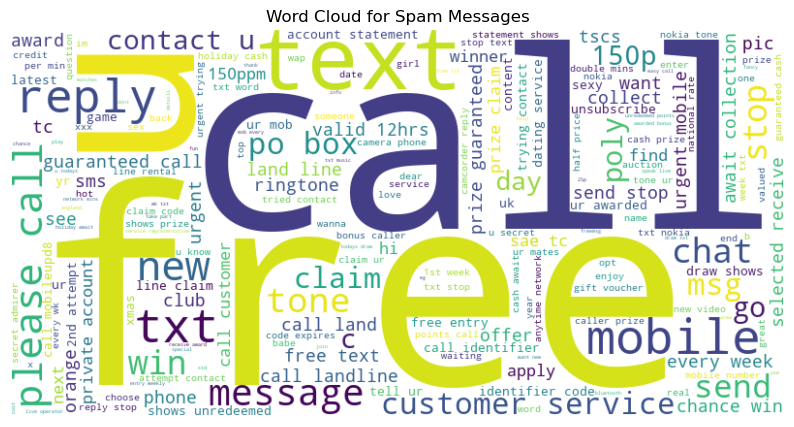

In [16]:
# Plot the word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

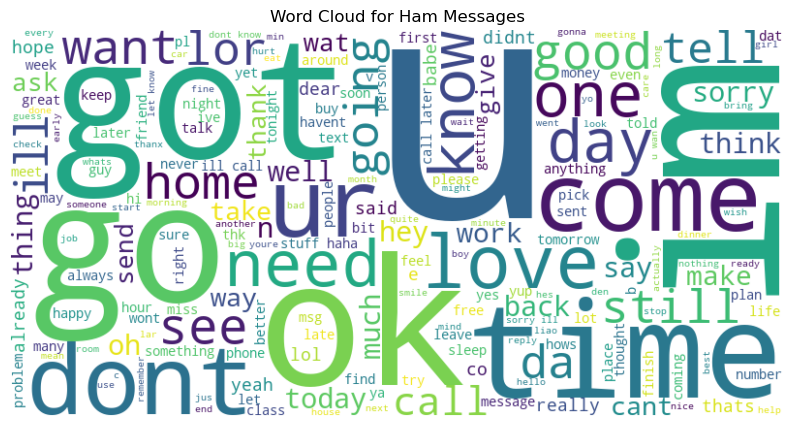

In [17]:
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))

# Plot the word cloud for ham messages
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       963
        spam       1.00      0.73      0.84       149

    accuracy                           0.96      1112
   macro avg       0.98      0.87      0.91      1112
weighted avg       0.97      0.96      0.96      1112

Confusion Matrix:


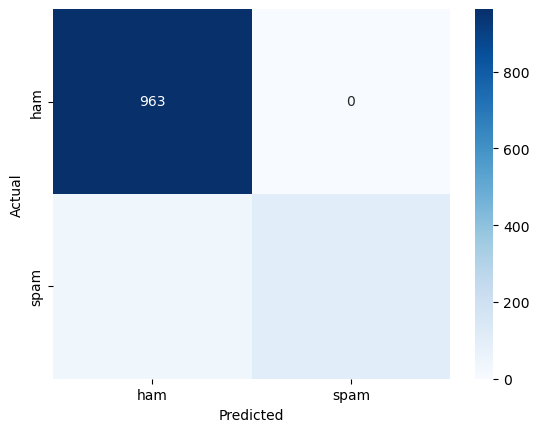

Accuracy Score:
0.9640287769784173


In [18]:

# Split the data into training and test sets
X = data['processed_text']
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classification model using Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

In [19]:
def predict_message(model, vectorizer, message):
    # Preprocess the message
    processed_message = preprocess_text(message)
    # Transform the message using the trained TF-IDF vectorizer
    transformed_message = vectorizer.transform([processed_message])
    # Predict the class (spam or ham)
    prediction = model.predict(transformed_message)
    return prediction[0]


In [20]:
sample_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
    "Hi, just checking in to see how you're doing. Let's catch up soon!",
    "URGENT! Your account has been compromised. Please reset your password immediately.",
    "Can we reschedule our meeting to next week? Let me know what time works for you."
]

for message in sample_messages:
    prediction = predict_message(model, tfidf_vectorizer, message)
    print(f"Message: {message}\nPrediction: {prediction}\n")


Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.
Prediction: spam

Message: Hi, just checking in to see how you're doing. Let's catch up soon!
Prediction: ham

Message: URGENT! Your account has been compromised. Please reset your password immediately.
Prediction: ham

Message: Can we reschedule our meeting to next week? Let me know what time works for you.
Prediction: ham

